<a href="https://colab.research.google.com/github/Gabinson200/ED2-DronePythonCode/blob/main/TSPwithGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### James Warszycki, Adam Kocsis
### Dr. Marques Oge
### CAP 4630
### Due Date:  7/8/2021
### Assignment 2
> This program implements an interactive solution to the travelling salesman problem.

In [ ]:
#importing libraries
import numpy as np, random, operator
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
# Used to represent the points that the travelling salesmen must pass through
class City:
  def __init__(self, x, y, label):
    self.x = x
    self.y = y
    self.label = label

In [ ]:
# class used to determine the fitness of individual routes
class Fitness:
  def __init__(self, route):
    self.route = route
    self.distance = 0
    self.fitness = 0.0

  def distance_between(self, pointA, pointB):
    return math.sqrt(math.pow(pointB.x - pointA.x, 2) + math.pow(pointB.y - pointA.y, 2))

  def routeDistance(self):
    distance = 0
    for i in range(1,len(self.route)):
      distance += self.distance_between(self.route[i], self.route[i-1])
    distance += self.distance_between(self.route[len(self.route) - 1], self.route[0])
    return distance
    
  #returns the fitness value (inverse of the route distance)
  def routeFitness(self):
    if self.fitness == 0:
      self.fitness = 1 / float(self.routeDistance())
    return self.fitness 

In [ ]:
#creates a list of size pop_size made of randomly sampled city lists
def initialPopulation(pop_size, city_list):
  population = []
  for i in range(0, pop_size):
    population.append(random.sample(city_list, len(city_list)))
  return population

In [ ]:
#represents the fitness of individuals and their fitness using a dictionary
def rankRoutes(population):
  #empty dictionary
  fitness_results = {}
  for i in range(0, len(population)):
    fitness_results[i] = Fitness(population[i]).routeFitness()
  #sorts dictionary based off of fitness
  sorted_fitness_results = sorted(fitness_results.items(), key = operator.itemgetter(1), reverse = True)
  #uncomment below to see results
  #print(sorted_fitness_results)
  return sorted_fitness_results

In [ ]:
# selects the parents that will be used to create the next generation
def selection(pop_ranked, elite_size):
  selection_results = []
  df = pd.DataFrame(np.array(pop_ranked), columns = ["Index", "Fitness"])
  #sums up the fitness values of all city lists in population
  df['cum_sum'] = df.Fitness.cumsum()
  #give percentage to each city list based off of fitness
  df['cum_perc'] = 100 * df.cum_sum / df.Fitness.sum()

  # automatically appends the first (elite_sized) members of population which have ranked the best
  for i in range(0, elite_size):
    selection_results.append(pop_ranked[i][0])

  for j in range(0, len(pop_ranked) - elite_size):
    #random integer between 0 and 100
    pick = 100 * random.random()
    for i in range(0, len(pop_ranked)):
      #if random pick value is less than or equal to i'th row's cum_perc value we append the city dictionary
      if pick <= df.iat[i, 3]:
        selection_results.append(pop_ranked[i][0])
        break
  #returns a list of route ids
  #print(selection_results)
  return selection_results

In [ ]:
#adds selected individuals to mating_pool
def matingPool(population, selection_results):
  mating_pool = []
  for i in range(0, len(selection_results)):
    index = selection_results[i]
    mating_pool.append(population[index])
  return mating_pool

In [ ]:
#we are using ordered crossover
def ordered_cross(parent1, parent2):
  child = []
  child_parent1 = []
  child_parent2 = []
  
  #this part is just so we can get a range which is less than the size of the list of cities
  geneA = int(random.random() * len(parent1))
  geneB = int(random.random() * len(parent1))
  start_gene = min(geneA, geneB)
  end_gene = max(geneA, geneB)

  for i in range(start_gene, end_gene):
    child_parent1.append(parent1[i])

  child_parent2 = [item for item in parent2 if item not in child_parent1]

  child = child_parent2[:start_gene] + child_parent1 + child_parent2[start_gene:]
  return child

In [ ]:
def breedPopulation(mating_pool, elite_size):
  children = []
  length = len(mating_pool) - elite_size
  pool = random.sample(mating_pool, len(mating_pool))

  #for the elite genes
  for i in range (0, elite_size):
    children.append(mating_pool[i])
  #if odd number then middle odd is saved basically
  for i in range(0, length):
    child = ordered_cross(pool[i], pool[len(mating_pool)-i-1])
    children.append(child)
  return children

In [ ]:
#modified this so the first element will never be swapped out of place (execute and test once based is done)
#we will use swap mutation (swaps the place of one city with another in the list of cities)
def mutate(individual, mutation_rate):
  #for every city in list
  for swapped in range(1, len(individual)):
    #if we mutate by chance (low probability)
    if(random.random() < mutation_rate):
      swap_with = int(random.random() * len(individual))
      city1 = individual[swapped]
      city2 = individual[swap_with]

      individual[swapped] = city2
      individual[swap_with] = city1
  return individual

In [ ]:
#we will use swap mutation (swaps the place of one city with another in the list of cities)
# def mutate(individual, mutation_rate):
#   #for every city in list
#   for swapped in range(len(individual)):
#     #if we mutate by chance (low probability)
#     if(random.random() < mutation_rate):
#       swap_with = int(random.random() * len(individual))
#       city1 = individual[swapped]
#       city2 = individual[swap_with]

#       individual[swapped] = city2
#       individual[swap_with] = city1
#   return individual

In [ ]:
#loops through the population and mutates the individuals inside 
def mutatePopulation(population, mutation_rate):
  mutated_pop = []
  for ind in range(0, len(population)):
    mutated_ind = mutate(population[ind], mutation_rate)
    mutated_pop.append(mutated_ind)
  return mutated_pop

In [ ]:
def nextGeneration(current_gen, elite_size, mutation_rate):
  pop_ranked = rankRoutes(current_gen)
  selection_results = selection(pop_ranked, elite_size)
  mating_pool = matingPool(current_gen, selection_results)
  children = breedPopulation(mating_pool, elite_size)
  next_gen = mutatePopulation(children, mutation_rate)
  return next_gen

In [ ]:
def geneticAlgorithm(population, pop_size, elite_size, mutation_rate, generations):
  pop = initialPopulation(pop_size, population)
  print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))

  for i in range(0, generations):
    pop = nextGeneration(pop, elite_size, mutation_rate)

  print("Final distance: " + str(1/ rankRoutes(pop)[0][1]))
  best_route_indexes = rankRoutes(pop)
  best_route_index = best_route_indexes[0][0]
  best_route = pop[best_route_index]

  best_labeled_route = []
  for i in range(0, len(best_route)):
    best_labeled_route.append(best_route[i].label)
  print(best_labeled_route)
  
  return best_route

In [ ]:
def mapPoints(points):
  for point in points:
    plt.scatter(point.x, point.y, c = "red", marker = "o")
    plt.text(point.x, point.y, point.label, fontweight = "bold")
  plt.show()

def mapPath(path):
  x = []
  y = []
  for point in path:
    x.append(point.x)
    y.append(point.y)
    plt.text(point.x, point.y, point.label, fontweight = "bold")
  x.append(path[0].x)
  y.append(path[0].y)
  plt.plot(x, y, "-o")
  plt.show()

### User Input:
#### (Must run above cells first)

Welcome to James Warszycki and Adam Kocsis's solution to CAP 4630 Assignment 2
This program implements an interactive solution to the classical AI Traveling Salesman Problem.

Input a seed to randomly generate the city locations: 10


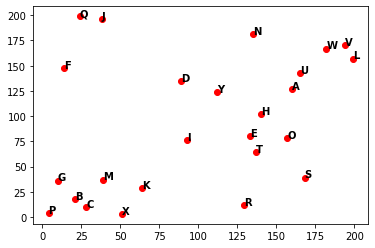

Input number of generations to run evolution for (higher is better, but increases computational time)(50 or above is recommended): 100
Initial distance: 2258.980019811172


In [ ]:
print("Welcome to James Warszycki and Adam Kocsis's solution to CAP 4630 Assignment 2")
print("This program implements an interactive solution to the classical AI Traveling Salesman Problem.")

quit = False
while quit != True:
    print()
    seed = input("Input a seed to randomly generate the city locations: ")
    random.seed(seed)

    city_list = []
    for i in range(0,25):
      city_list.append(City(x = int(random.random() * 200), y = int(random.random() * 200), label = chr(65 + i)))

    mapPoints(city_list)

    gens = input("Input number of generations to run evolution for (higher is better, but increases computational time)(50 or above is recommended): ")

    best_route_obj_list = geneticAlgorithm(population=city_list, pop_size=100, elite_size=20, mutation_rate=0.01, generations=int(gens))
    best_route_cities = np.array(best_route_obj_list)
    #print()
    #for city in best_route_cities:
    #  print(city.label, "(", city.x, ",", city.y, ")")

    mapPath(best_route_cities)

    check = input("Would you like to retry with another seed or number of generations (Y or N): ")

    if check == "N":
      quit = True